In [ ]:
# YOA 1~2 : extending figure 2(C) 
# network representatation of similarity btw RNA-protein binding sites, ft. structure, NA-protein interaction prediction (ipldddt)
# note : pilot study with toy dataset 

In [1]:
toy_motifs = [
    {"id": "motif1", "sequence": "GGAGAU", "structure": "..((.."},
    {"id": "motif2", "sequence": "GGAGGU", "structure": "..((.."},
    {"id": "motif3", "sequence": "CGAUCC", "structure": ".((..)."},
    {"id": "motif4", "sequence": "GGAUGA", "structure": "..(..)"},
    {"id": "motif5", "sequence": "AUUGGA", "structure": "..((.."},
]

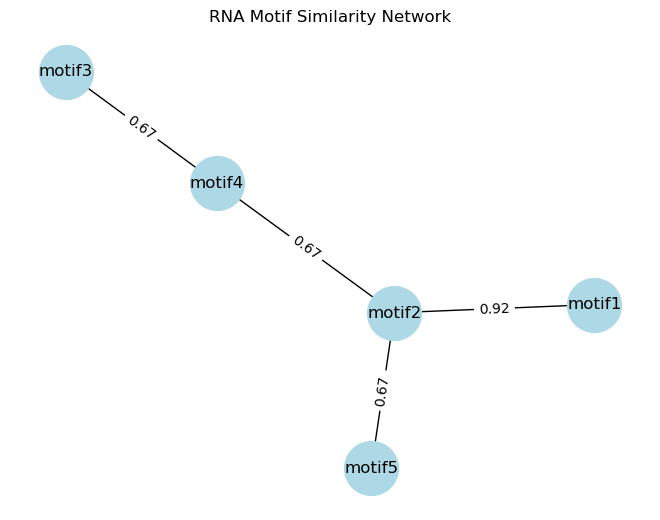

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Toy data
motifs = [
    {"id": "motif1", "sequence": "GGAGAU", "structure": "..((.."},
    {"id": "motif2", "sequence": "GGAGGU", "structure": "..((.."},
    {"id": "motif3", "sequence": "CGAUCC", "structure": ".((..)."},
    {"id": "motif4", "sequence": "GGAUGA", "structure": "..(..)"},
    {"id": "motif5", "sequence": "AUUGGA", "structure": "..((.."},
]

def sequence_similarity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1, seq2))
    return matches / min_len

def structure_similarity(str1, str2):
    min_len = min(len(str1), len(str2))
    matches = sum(a == b for a, b in zip(str1, str2))
    return matches / min_len

def motif_similarity(m1, m2):
    seq_sim = sequence_similarity(m1["sequence"], m2["sequence"])
    struct_sim = structure_similarity(m1["structure"], m2["structure"])
    return (seq_sim + struct_sim) / 2

# Build graph
G = nx.Graph()
for motif in motifs:
    G.add_node(motif["id"])

# Add edges based on similarity
threshold = 0.6
for i in range(len(motifs)):
    for j in range(i+1, len(motifs)):
        sim = motif_similarity(motifs[i], motifs[j])
        if sim >= threshold:
            G.add_edge(motifs[i]["id"], motifs[j]["id"], weight=round(sim, 2))

# Draw
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("RNA Motif Similarity Network")
plt.show()
